In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_excel('premiums_young_with_gr.xlsx')

In [3]:
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount,Genetical_Risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [4]:
df.shape

(20096, 14)

In [5]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount', 'Genetical_Risk'],
      dtype='object')

In [6]:
df.columns.str.replace(' ','_').str.lower()

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [7]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [8]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

### Handling NA values

In [9]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
genetical_risk           0
dtype: int64

In [12]:
df.shape

(20090, 14)

### Handling duplicate values

In [13]:
df.duplicated().sum()

0

In [14]:
df  = df.drop_duplicates()

In [15]:
df.duplicated().value_counts()

False    20090
Name: count, dtype: int64

In [16]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267,2.503932
std,2.294052,0.940713,23.420493,2749.906347,1.710203
min,18.000000,-3.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


In [17]:
df[df['number_of_dependants']<0].shape

(22, 14)

In [18]:
df[df['number_of_dependants']<0]['number_of_dependants'].unique()

array([-3, -1])

In [19]:
### it seems like by mistake they were marked as negative but should have been positive

In [20]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

In [21]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


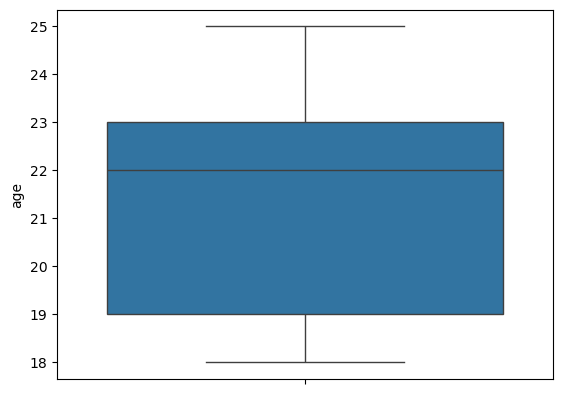

In [22]:
sns.boxplot(df['age'])
plt.show()

In [23]:
num_columns = df.select_dtypes(include = np.number).columns

In [24]:
num_columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount',
       'genetical_risk'],
      dtype='object')

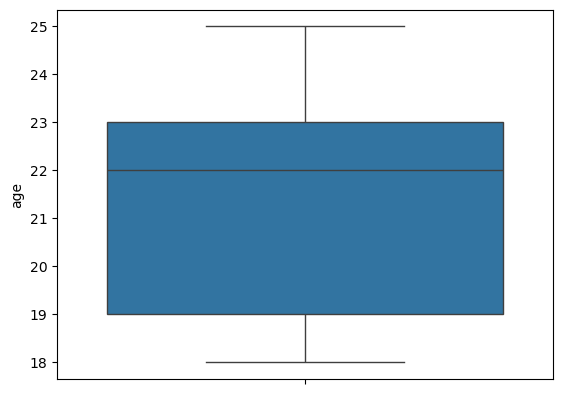

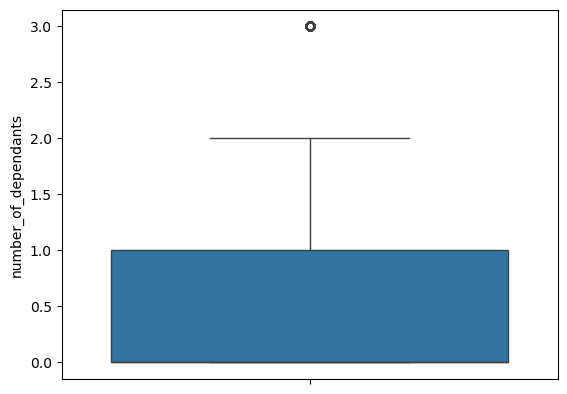

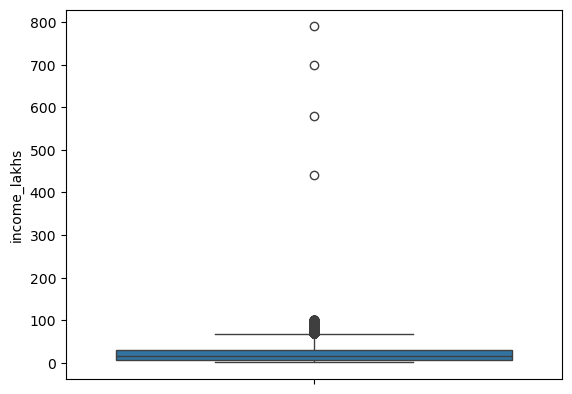

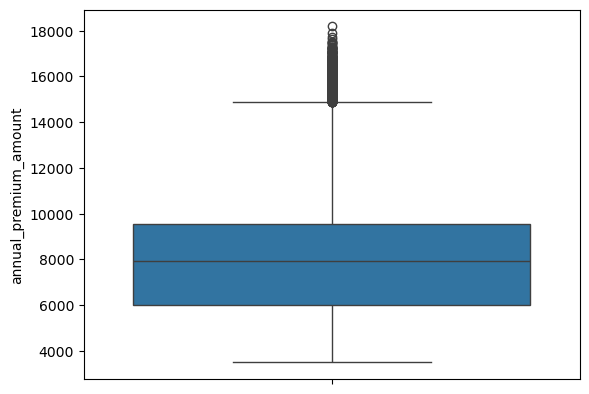

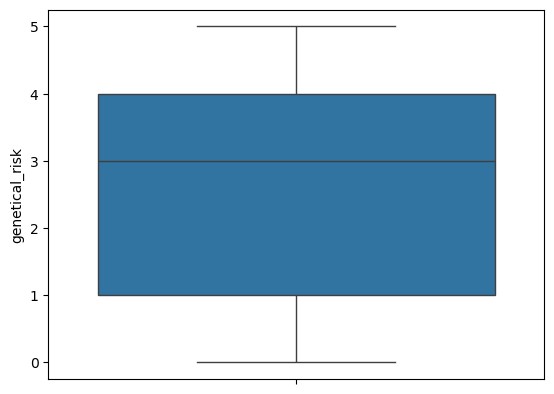

In [25]:
for col in num_columns:
    sns.boxplot(df[col])
    plt.show()

In [26]:
# with common knowledge and discussion with business we can take 100 as a threshold for age

In [27]:
df[df['age']>100]['age'].unique()

array([], dtype=int64)

In [28]:
df1 = df[df['age'] <= 100].copy()

In [29]:
df1.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1


In [30]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20090.000000,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267,2.503932
std,2.294052,0.937200,23.420493,2749.906347,1.710203
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.250000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,790.000000,18186.000000,5.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

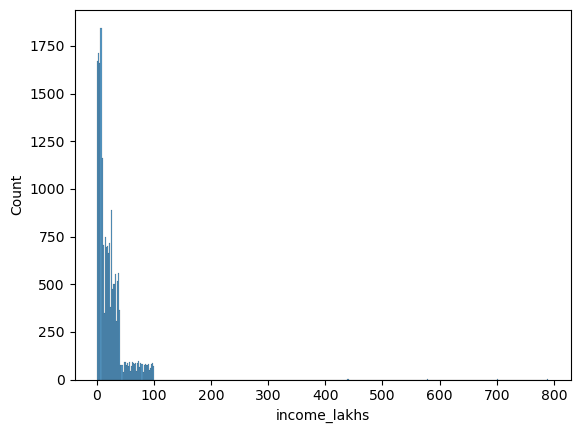

In [31]:
sns.histplot(df1['income_lakhs'])

In [32]:
df['income_lakhs'].quantile(.50)

16.0

In [33]:
def get_iqr_bounds(data,col):
    q1,q3 = data[col].quantile([.25,.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5* iqr
    return lower_bound,upper_bound

In [34]:
get_iqr_bounds(df1,'income_lakhs')

(-31.5, 68.5)

In [35]:
df1['income_lakhs'].quantile(.999)

100.0

In [36]:
# it is not necessary to use iqr always, discuss with business and try to find a good threshold, here after discussing with business 100 seemed fine


In [37]:
df1[df1['income_lakhs']>100]['income_lakhs'].shape

(4,)

In [38]:
# only 10 are there, so we can safely remove them

In [39]:
df2 = df1[df1['income_lakhs']<= 100].copy()

<Axes: xlabel='income_lakhs', ylabel='Count'>

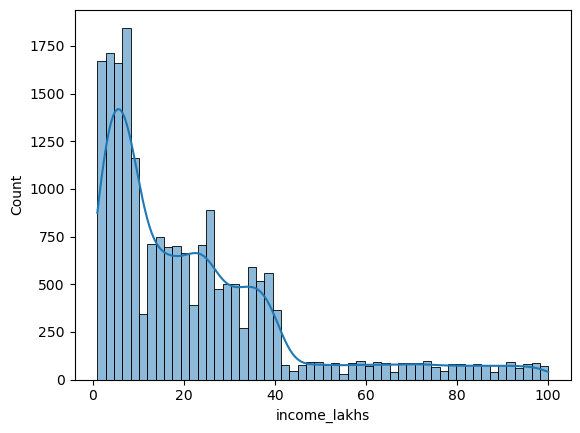

In [40]:
sns.histplot(df2['income_lakhs'],kde = True)

In [41]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883
std,2.294248,0.937238,21.732062,2749.912486,1.710184
min,18.000000,0.000000,1.000000,3501.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000


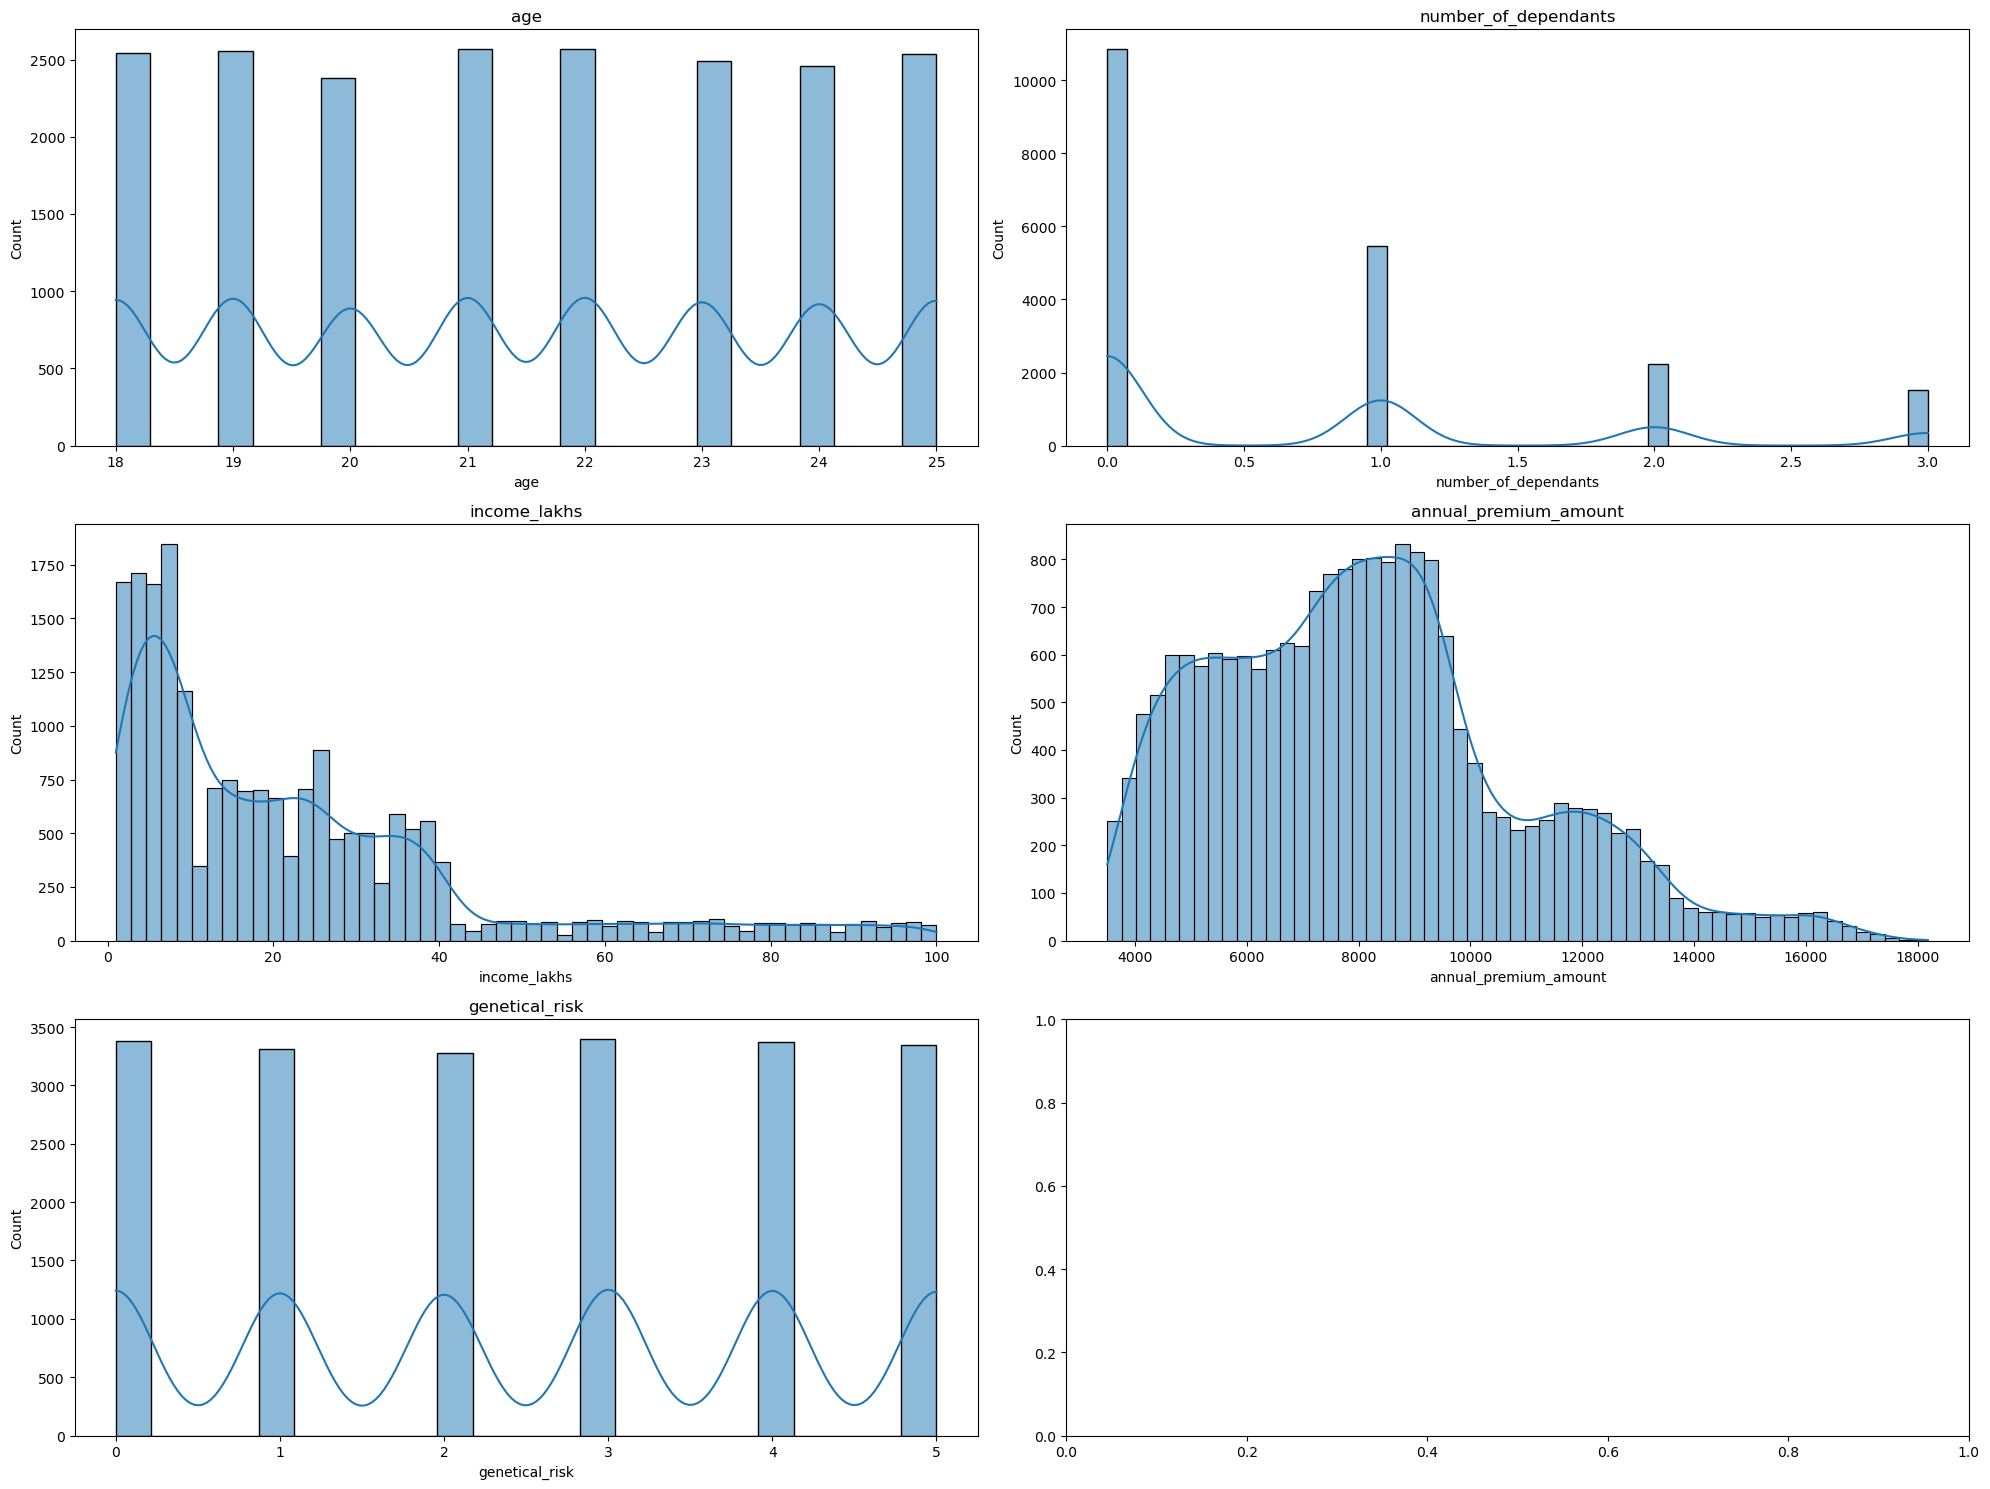

In [60]:
fig, axes = plt.subplots(3,2,figsize = (20,15))
axes = axes.flatten()
for i,col in enumerate(num_columns):
    ax = axes[i]
    sns.histplot(df2[col],kde = True, ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

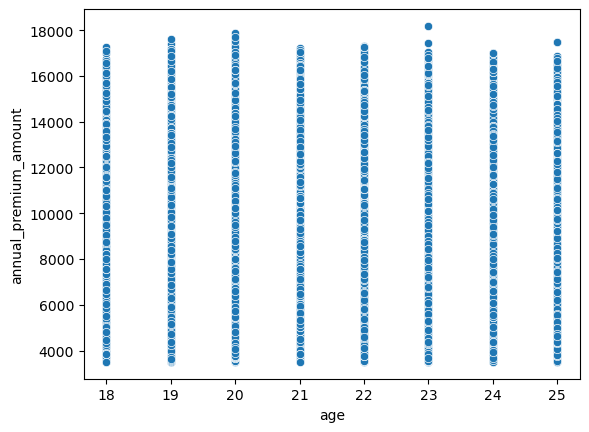

In [61]:
sns.scatterplot(data = df2, x = 'age', y = 'annual_premium_amount')

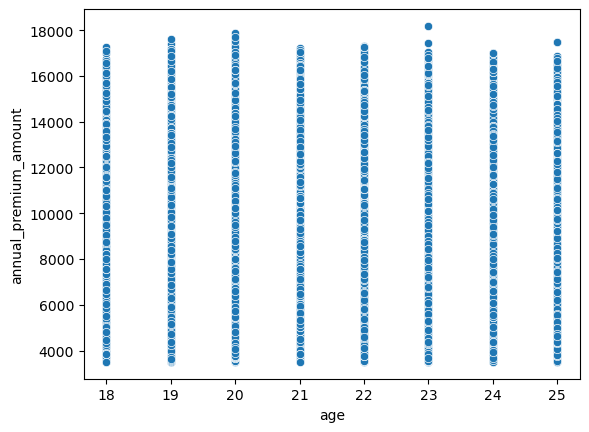

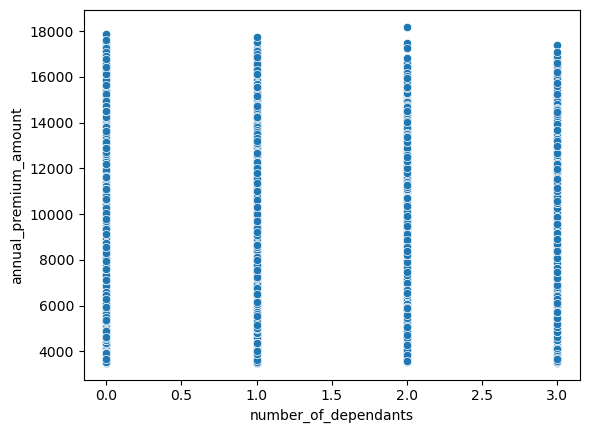

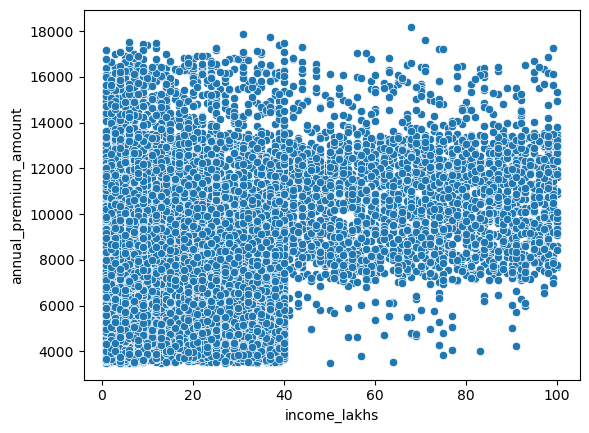

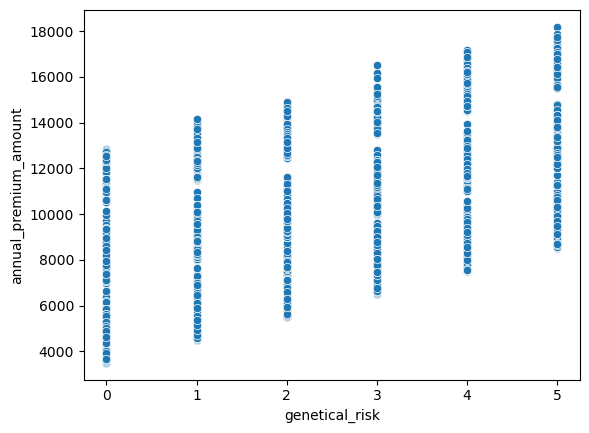

In [62]:
for i in num_columns.drop('annual_premium_amount'):
    sns.scatterplot(data = df2, y = 'annual_premium_amount', x = i)
    plt.show()

In [63]:
cat_columns = df2.select_dtypes(exclude = 'number').columns
cat_columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [64]:
for i in cat_columns:
    print(f'{i}: {df2[i].unique()}')

gender: ['Male' 'Female']
region: ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status: ['Regular' 'No Smoking' 'Occasional']
employment_status: ['Self-Employed' 'Freelancer' 'Salaried']
income_level: ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history: ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan: ['Silver' 'Bronze' 'Gold']


In [65]:
## the smoking status has wrong values lets replace them

In [66]:
smoke = {'Smoking=0':'No Smoking','Does Not Smoke':'No Smoking','Not Smoking':'No Smoking' }
df2['smoking_status'] = df2['smoking_status'].replace(smoke)

In [67]:
for i in cat_columns:
    print(f'{i} : {df2[i].unique()}')

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [68]:
cat_columns.shape

(9,)

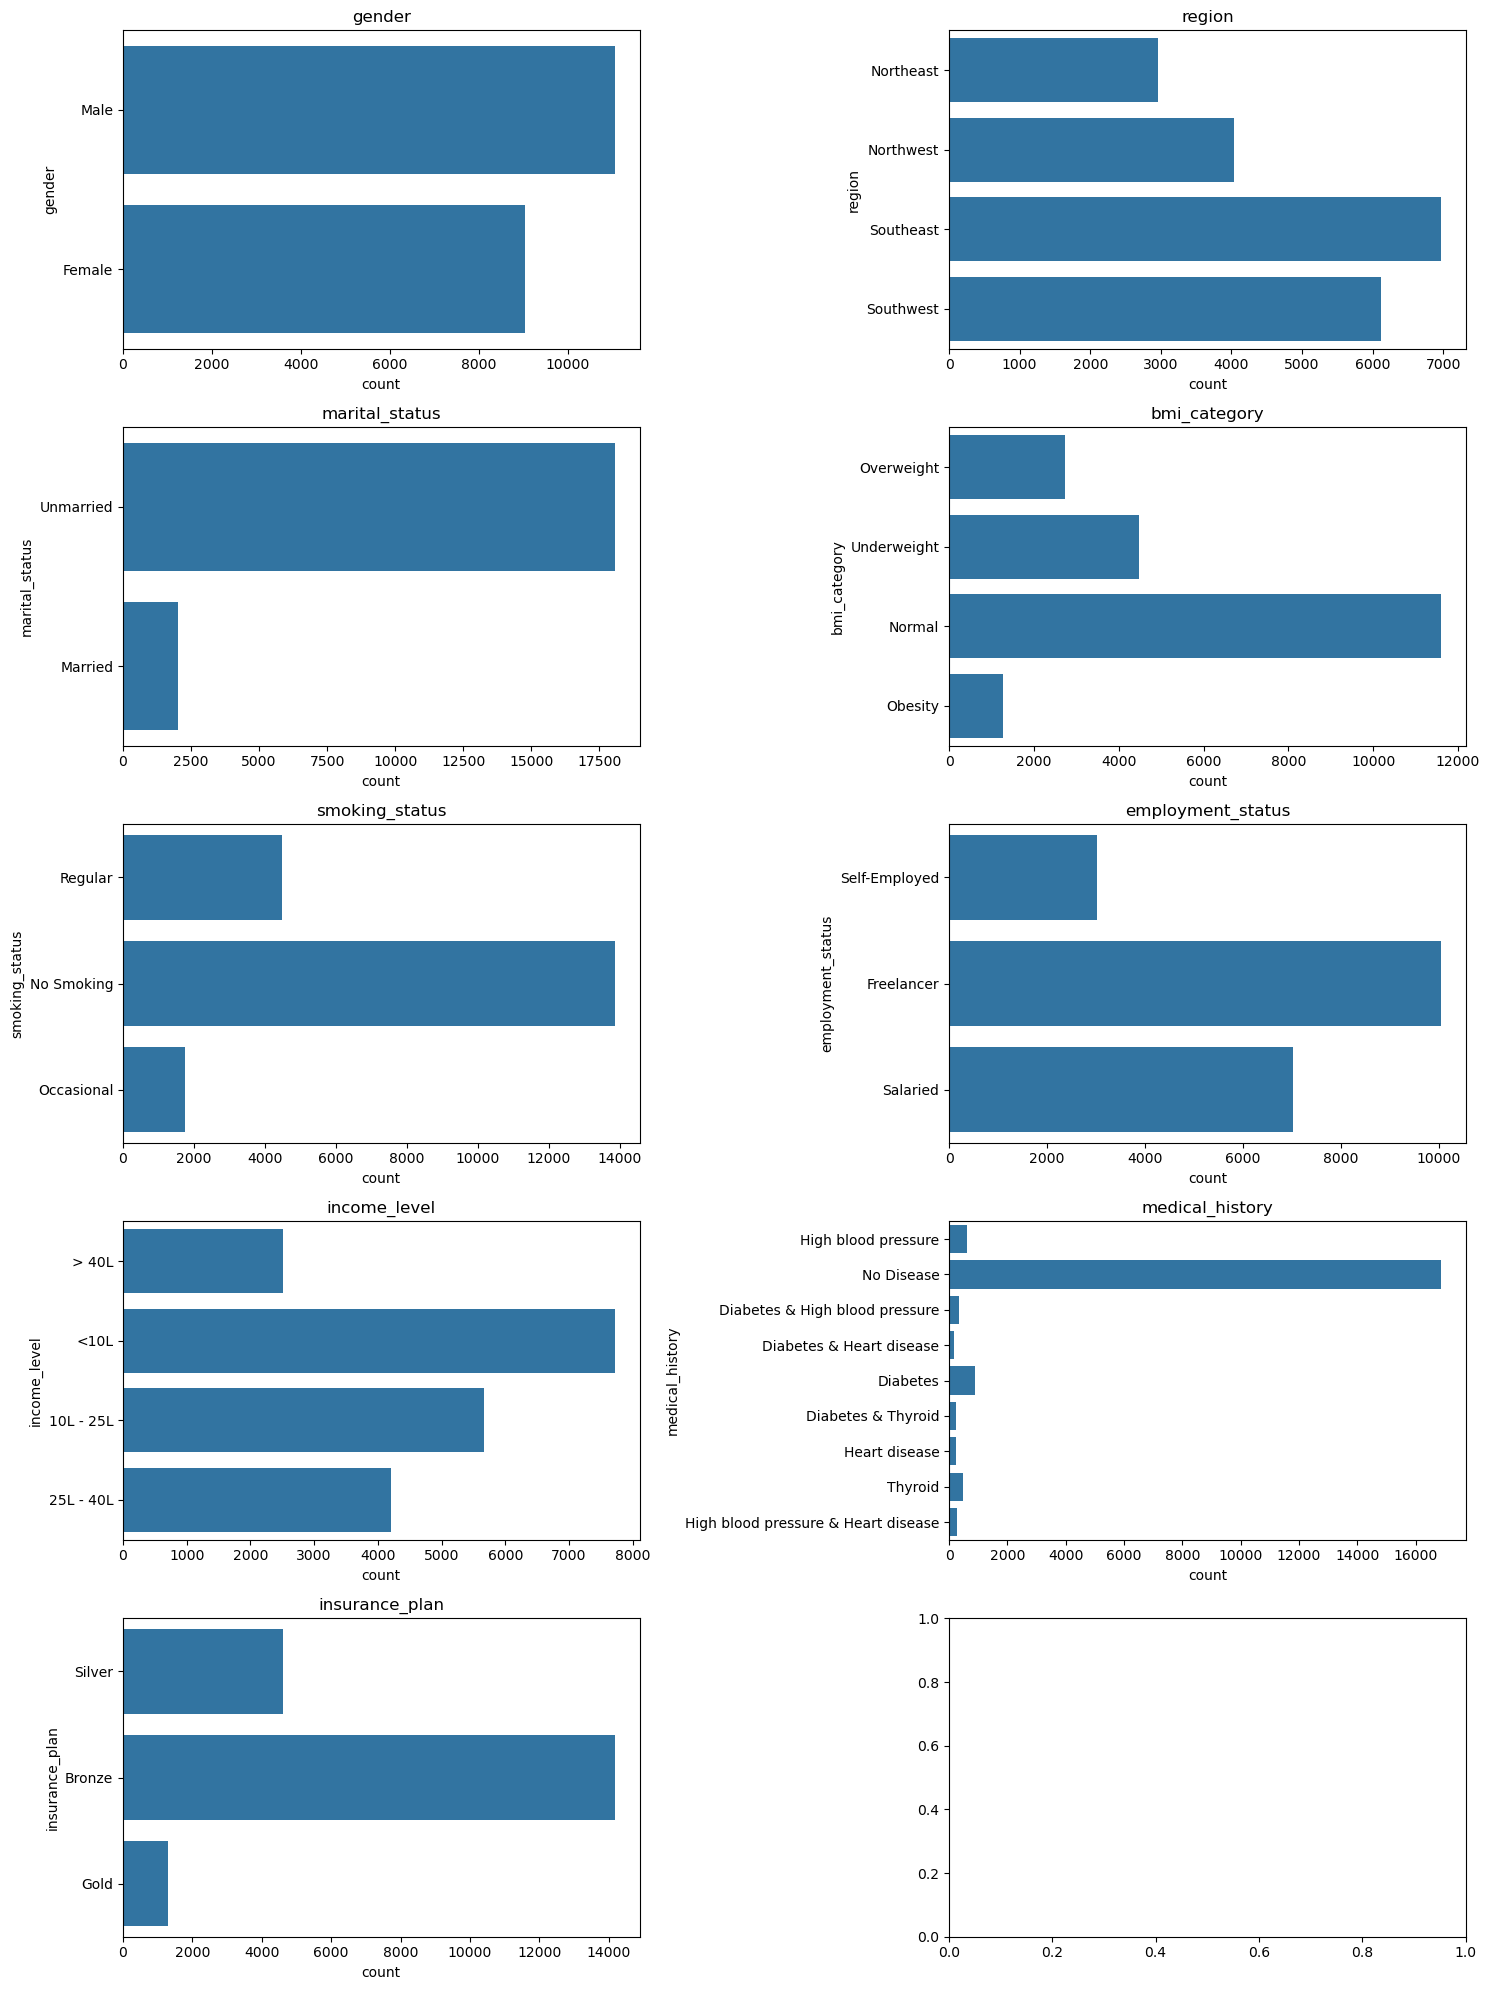

In [69]:
fig, axes = plt.subplots(5,2,figsize = (15,20))
for i,col in enumerate(cat_columns):
    ax = axes[i//2,i%2]
    sns.countplot(df2[col],ax = ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

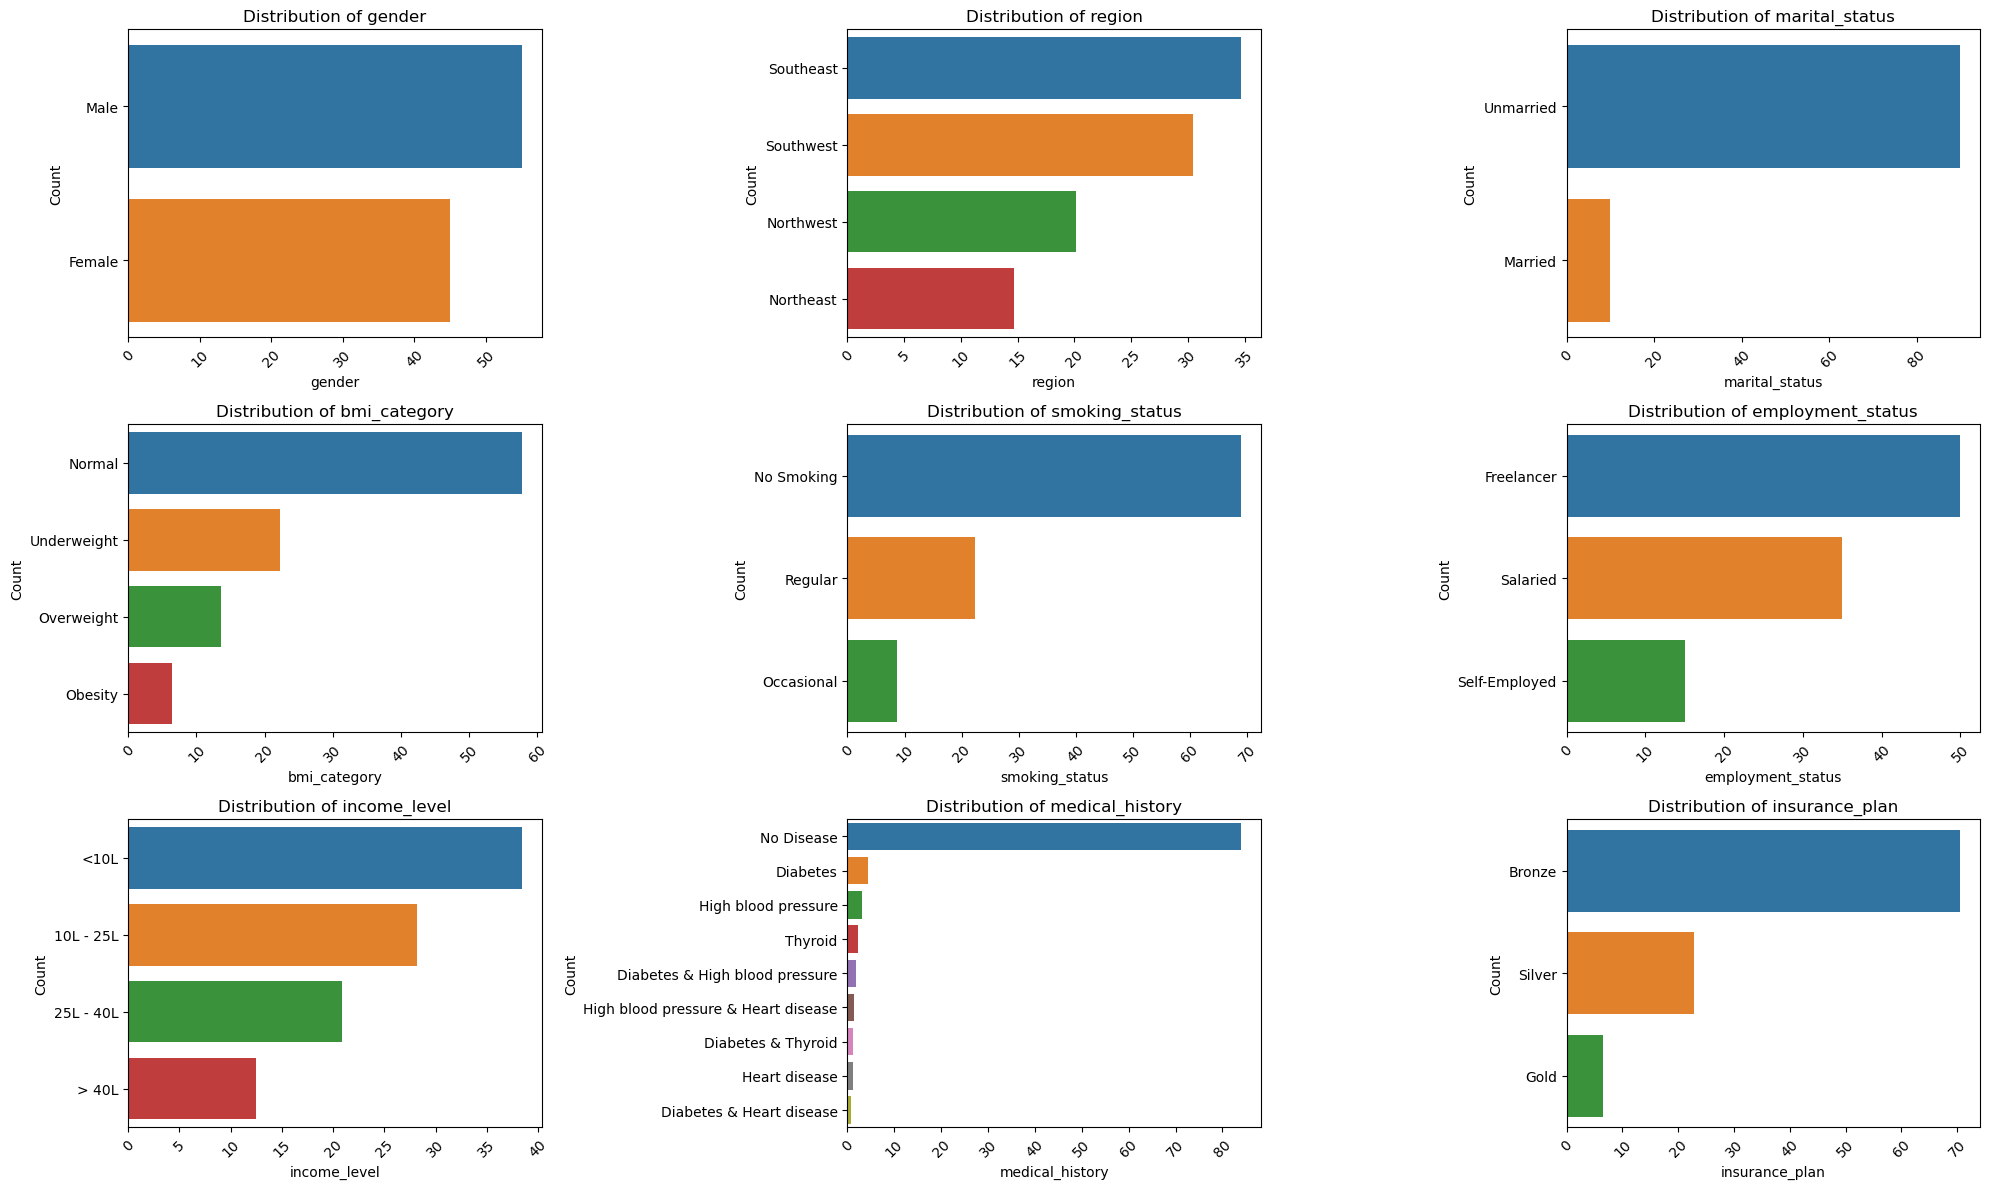

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid (since 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(20,12))
axes = axes.flatten()  # Flatten to simplify indexing

for i, col in enumerate(cat_columns):
    ax = axes[i]
    
    # Sort categories by count
    sorted_counts = (df2[col].value_counts(normalize = True)*100).sort_values(ascending=False)
    
    # Plot with sorted order
    sns.barplot(y=sorted_counts.index, x=sorted_counts.values,hue = sorted_counts.index, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [71]:
cross = pd.crosstab(df2['income_level'],df2['insurance_plan'])
cross

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,4508,326,828
25L - 40L,3382,209,608
<10L,6172,404,1145
> 40L,115,366,2023


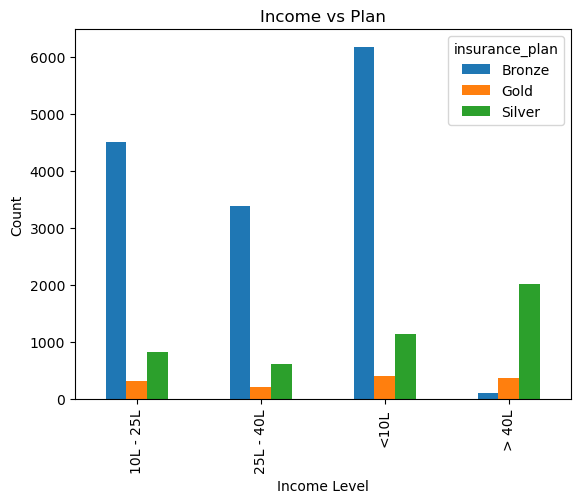

In [72]:
cross.plot(kind = 'bar')
plt.title('Income vs Plan')
plt.ylabel('Count')
plt.xlabel('Income Level')
plt.show()

<Axes: xlabel='insurance_plan', ylabel='income_level'>

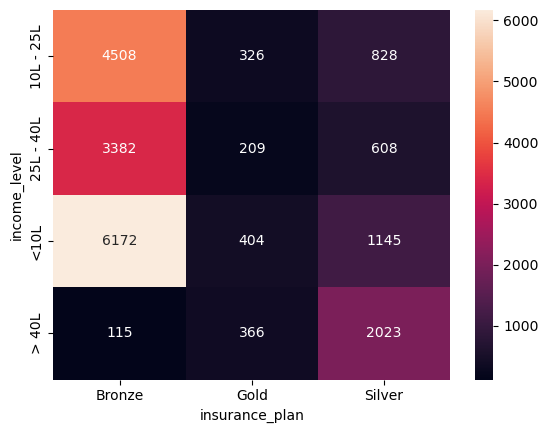

In [73]:
sns.heatmap(cross, annot = True, fmt = 'd')

In [74]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk'],
      dtype='object')

In [75]:
df2['medical_history'].unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [76]:
# we want to score each disease and create one disease score for each patient
# based on discussion with business, below list of risk scores was finalised

In [77]:
risk_scores = {'diabetes':6, 'heart disease':8, 'high blood pressure':6,'thyroid':5, 'no disease':0,'none':0}

In [78]:
df2['med_new'] = df2['medical_history'].str.lower().str.split('&')

In [79]:
df2['med_new'] = df2['med_new'].apply(lambda lst: [i.strip() for i in lst])

In [80]:
print(df2['med_new'].sample(5))

2137     [no disease]
15561      [diabetes]
8157     [no disease]
1830     [no disease]
1695     [no disease]
Name: med_new, dtype: object


In [81]:
def tot_risk_score(lst):
    tot = 0
    for i in lst:
        tot += risk_scores[i]
    return tot

In [82]:
df2['med_new'].head()

0    [high blood pressure]
1             [no disease]
2             [no disease]
3             [no disease]
4             [no disease]
Name: med_new, dtype: object

In [83]:
df2['total_risk_score'] = df2['med_new'].apply(tot_risk_score)

In [84]:
df2.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,med_new,total_risk_score
9492,24,Female,Southwest,Unmarried,1,Normal,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8351,1,[no disease],0
10548,20,Male,Northeast,Unmarried,0,Normal,Occasional,Salaried,<10L,4,No Disease,Bronze,9078,5,[no disease],0
2294,22,Male,Northeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,7844,4,[no disease],0
3984,20,Male,Southeast,Unmarried,0,Overweight,No Smoking,Salaried,10L - 25L,17,No Disease,Silver,8084,0,[no disease],0
15406,22,Female,Southeast,Unmarried,0,Underweight,Occasional,Freelancer,25L - 40L,37,No Disease,Bronze,5708,1,[no disease],0
12875,19,Female,Southwest,Unmarried,0,Normal,No Smoking,Salaried,> 40L,93,No Disease,Silver,11611,4,[no disease],0
9661,19,Male,Southwest,Unmarried,1,Underweight,No Smoking,Freelancer,<10L,7,No Disease,Bronze,5215,1,[no disease],0
11330,23,Female,Southeast,Unmarried,2,Normal,No Smoking,Freelancer,25L - 40L,34,No Disease,Silver,7845,0,[no disease],0
12173,21,Male,Southeast,Unmarried,1,Normal,No Smoking,Salaried,10L - 25L,22,Thyroid,Bronze,8213,4,[thyroid],5
15902,22,Male,Southeast,Unmarried,2,Underweight,No Smoking,Freelancer,25L - 40L,27,No Disease,Bronze,6300,2,[no disease],0


In [85]:
df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount,genetical_risk,total_risk_score
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,21.494474,0.722742,22.390371,8141.799263,2.503883,1.289057
std,2.294248,0.937238,21.732062,2749.912486,1.710184,3.220220
min,18.000000,0.000000,1.000000,3501.000000,0.000000,0.000000
25%,19.000000,0.000000,6.000000,6022.000000,1.000000,0.000000
50%,22.000000,0.000000,16.000000,7939.000000,3.000000,0.000000
75%,23.000000,1.000000,31.000000,9561.000000,4.000000,0.000000
max,25.000000,3.000000,100.000000,18186.000000,5.000000,14.000000


In [86]:
max_risk = df2['total_risk_score'].max()
min_risk = df2['total_risk_score'].min()

In [87]:
df2['norm_risk_score'] = (df2['total_risk_score'] - min_risk)/(max_risk - min_risk)

In [88]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,med_new,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,[high blood pressure],6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,[no disease],0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,[no disease],0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,[no disease],0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,[no disease],0,0.000000


In [89]:
df2 = df2.drop(columns = 'med_new')

In [90]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,4,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,3,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,4,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,2,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,1,0,0.000000


In [91]:
# now lets move to insurance plan

In [92]:
df2['insurance_plan'].unique()

array(['Silver', 'Bronze', 'Gold'], dtype=object)

In [93]:
plans = {'Bronze':1, 'Silver':2, 'Gold':3}

In [94]:
df2['insurance_plan'] = df2['insurance_plan'].map(plans)

In [95]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,2,13365,4,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,2,11050,3,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,2,11857,4,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,1,5684,2,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,1,5712,1,0,0.000000


In [96]:
df2['income_level'].unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [97]:
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L':2, '25L - 40L':3, '> 40L':4 })

In [98]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,norm_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,4,99,High blood pressure,2,13365,4,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,1,3,No Disease,2,11050,3,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,4,97,No Disease,2,11857,4,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,2,15,No Disease,1,5684,2,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,2,14,No Disease,1,5712,1,0,0.000000


In [99]:
df2.dtypes

age                        int64
gender                    object
region                    object
marital_status            object
number_of_dependants       int64
bmi_category              object
smoking_status            object
employment_status         object
income_level               int64
income_lakhs               int64
medical_history           object
insurance_plan             int64
annual_premium_amount      int64
genetical_risk             int64
total_risk_score           int64
norm_risk_score          float64
dtype: object

In [100]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount', 'genetical_risk', 'total_risk_score',
       'norm_risk_score'],
      dtype='object')

In [101]:
df2.select_dtypes(exclude = 'number').columns

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'medical_history'],
      dtype='object')

In [102]:
col_for_hot_enc = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']

In [103]:
df3 = pd.get_dummies(df2, columns = col_for_hot_enc, drop_first = True,dtype = int).copy()

In [104]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,genetical_risk,total_risk_score,norm_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,High blood pressure,2,13365,4,6,0.428571,...,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,No Disease,2,11050,3,0,0.000000,...,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,No Disease,2,11857,4,0,0.000000,...,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,No Disease,1,5684,2,0,0.000000,...,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,No Disease,1,5712,1,0,0.000000,...,1,0,1,0,1,0,0,0,0,0


In [105]:
df3 = df3.drop(columns = ['medical_history','total_risk_score'])

In [106]:
df3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,4,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,3,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,4,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,2,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,1,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [107]:
cm = df3.corr()
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.003096,-0.010634,-0.016671,-0.018195,-0.010815,0.005195,0.003074,0.007791,0.002698,-0.003419,0.006922,0.000389,-0.001597,0.022006,-0.003068,-0.011040,-0.009827,-0.009493,0.001680
number_of_dependants,0.003096,1.000000,-0.014268,-0.014835,0.007802,0.005909,-0.008507,0.044009,-0.008213,0.014965,-0.000088,-0.011166,-0.722696,0.004090,0.002822,-0.000630,-0.015309,-0.001891,-0.013320,0.010281
income_level,-0.010634,-0.014268,1.000000,0.908131,0.322278,0.244373,-0.003485,-0.005214,0.026991,-0.003467,-0.003369,0.011454,0.012376,0.011474,0.013096,-0.003746,0.006059,0.000315,-0.111361,0.103160
income_lakhs,-0.016671,-0.014835,0.908131,1.000000,0.380968,0.290683,0.001163,-0.006630,0.000951,-0.006349,-0.004859,0.015674,0.014021,0.014379,0.008312,-0.000598,0.006187,-0.010641,-0.084416,0.083316
insurance_plan,-0.018195,0.007802,0.322278,0.380968,1.000000,0.761004,-0.002717,0.001951,-0.016589,-0.006221,-0.007836,0.013644,-0.006561,0.002285,-0.006236,0.007766,-0.001517,-0.008755,-0.016911,0.026543
annual_premium_amount,-0.010815,0.005909,0.244373,0.290683,0.761004,1.000000,0.619001,0.090702,0.000251,-0.017573,0.002388,0.008090,-0.008706,0.064828,0.036573,0.004972,0.008673,0.085407,-0.015318,0.024136
genetical_risk,0.005195,-0.008507,-0.003485,0.001163,-0.002717,0.619001,1.000000,-0.006758,-0.007633,-0.019909,0.014583,-0.004539,0.003134,-0.001069,0.000284,0.010509,0.006400,0.004686,-0.003772,0.004591
norm_risk_score,0.003074,0.044009,-0.005214,-0.006630,0.001951,0.090702,-0.006758,1.000000,-0.000234,-0.000102,-0.008037,-0.004214,-0.056335,0.001278,0.000108,-0.010735,-0.008724,0.003557,-0.005101,-0.002150
gender_Male,0.007791,-0.008213,0.026991,0.000951,-0.016589,0.000251,-0.007633,-0.000234,1.000000,-0.002796,-0.000131,-0.002445,0.009276,-0.061257,0.043389,-0.060075,0.053469,0.202788,0.006978,-0.001052
region_Northwest,0.002698,0.014965,-0.003467,-0.006349,-0.006221,-0.017573,-0.019909,-0.000102,-0.002796,1.000000,-0.365912,-0.332236,-0.009604,-0.010099,0.003283,0.003720,-0.000543,-0.002375,0.010613,0.000254


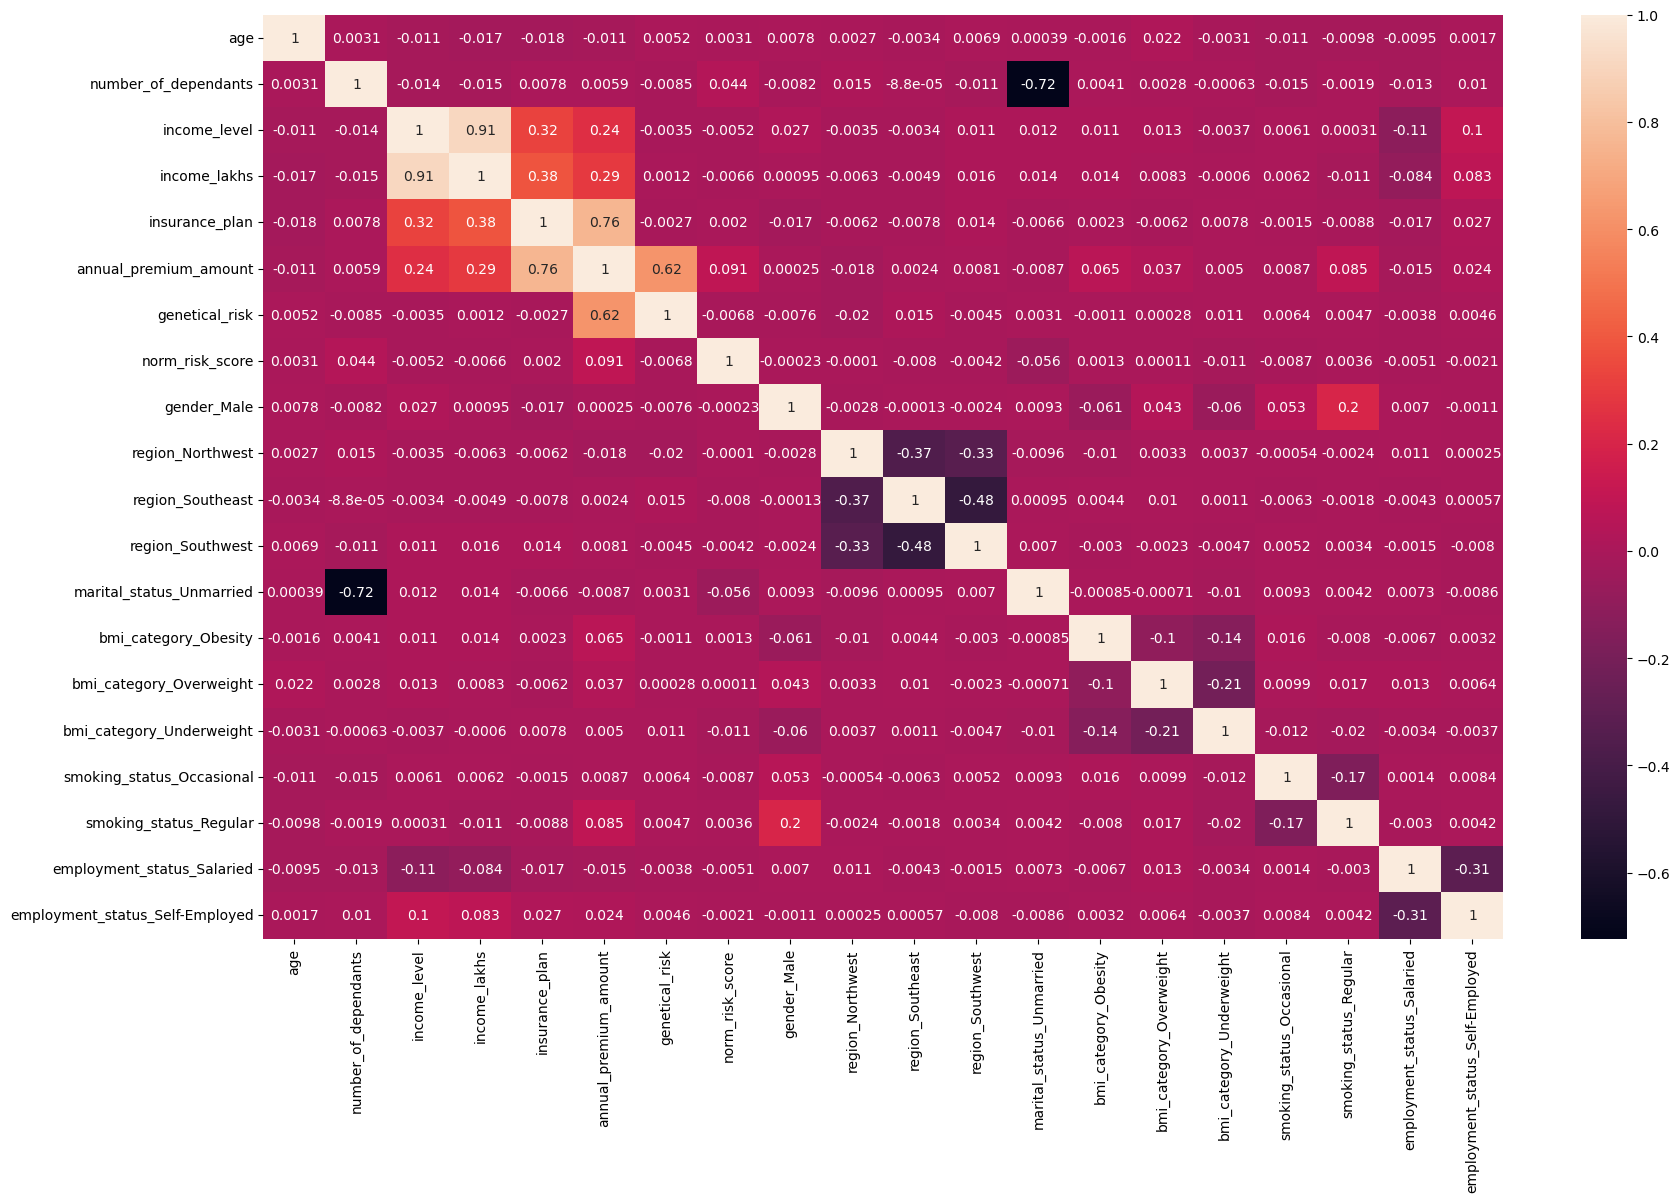

In [108]:
plt.figure(figsize = (20,12))
sns.heatmap(cm,annot = True)
plt.show()

In [110]:
# as we can see the correlation of genetical risk score with premium amount is .62 that means it has good influence on our target variable

In [111]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'genetical_risk',
       'norm_risk_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

In [112]:
X = df3.drop(columns = 'annual_premium_amount')
y = df3['annual_premium_amount']

In [114]:
# scaling the features before using vif for feature selection

In [117]:
cols_to_scale = ['age', 'number_of_dependants', 'income_level', 'income_lakhs','insurance_plan','genetical_risk']
scaler = MinMaxScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

In [118]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [119]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000,20086.000000
mean,0.499211,0.240914,0.357994,0.216064,0.179578,0.500777,0.092076,0.550383,0.201284,0.346958,0.304590,0.899881,0.063527,0.136513,0.222493,0.086379,0.223589,0.350045,0.149955
std,0.327750,0.312413,0.347481,0.219516,0.300051,0.342037,0.230016,0.497467,0.400970,0.476014,0.460245,0.300167,0.243914,0.343341,0.415931,0.280929,0.416660,0.476996,0.357036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.050505,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.571429,0.000000,0.333333,0.151515,0.000000,0.600000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.303030,0.500000,0.800000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
def get_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
    return vif_df

In [121]:
get_vif(X)

,Column,VIF
0,age,3.154599
1,number_of_dependants,1.930428
2,income_level,11.928708
3,income_lakhs,11.876413
4,insurance_plan,1.592966
5,genetical_risk,2.981159
6,norm_risk_score,1.154501
7,gender_Male,2.311831
8,region_Northwest,2.154355
9,region_Southeast,2.990493


In [122]:
# as we can see here, income level and income lakhs have vif> 10
# remove feature iteratively and not in a bunch

In [123]:
get_vif(X.drop(columns = 'income_level'))

,Column,VIF
0,age,3.153255
1,number_of_dependants,1.927788
2,income_lakhs,2.294155
3,insurance_plan,1.587868
4,genetical_risk,2.981158
5,norm_risk_score,1.154453
6,gender_Male,2.301658
7,region_Northwest,2.153423
8,region_Southeast,2.989301
9,region_Southwest,2.743932


In [124]:
# as we can see now the vif are well below 5, we need not remove any other features

In [125]:
X_reduced = X.drop(columns = 'income_level')

In [126]:
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,0.989899,0.5,0.8,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020202,0.5,0.6,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.969697,0.5,0.8,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.141414,0.0,0.4,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.131313,0.0,0.2,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Model Training

In [127]:
X_train,X_test, y_train,y_test = train_test_split(X_reduced,y,test_size = .3,random_state = 3)

In [128]:
print(X_train.shape)
print(X_test.shape)

(14060, 18)
(6026, 18)


In [129]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [130]:
lr_model.score(X_test,y_test)

0.9885387057335232

In [131]:
#to check overfitting lets see score on train as well

In [132]:
lr_model.score(X_train,y_train)

0.9883810877270538

In [133]:
# these are almost same, so our model is not overfitting

In [134]:
# as we can see, the performance has dropped drastically from age>25 group. it was expected from our observation

In [135]:
lr_model.coef_

array([ 6.62383596e+00,  1.35226533e+01, -7.45476230e+00,  7.00090243e+03,
        4.99093297e+03,  1.12012736e+03,  6.03632811e+00,  8.20124529e+00,
        1.23212833e+00,  8.42001879e+00, -1.32565343e+00,  8.01024468e+02,
        4.02495522e+02,  1.03070737e+02,  1.97131219e+02,  6.13728514e+02,
        6.18996249e+00, -5.01093092e-01])

In [136]:
lr_model_coef_df = pd.DataFrame({'Feature':X_train.columns, 'Coef': lr_model.coef_})

In [137]:
lr_model_coef_df

,Feature,Coef
0,age,6.623836
1,number_of_dependants,13.522653
2,income_lakhs,-7.454762
3,insurance_plan,7000.902430
4,genetical_risk,4990.932965
5,norm_risk_score,1120.127358
6,gender_Male,6.036328
7,region_Northwest,8.201245
8,region_Southeast,1.232128
9,region_Southwest,8.420019


<Axes: xlabel='Feature'>

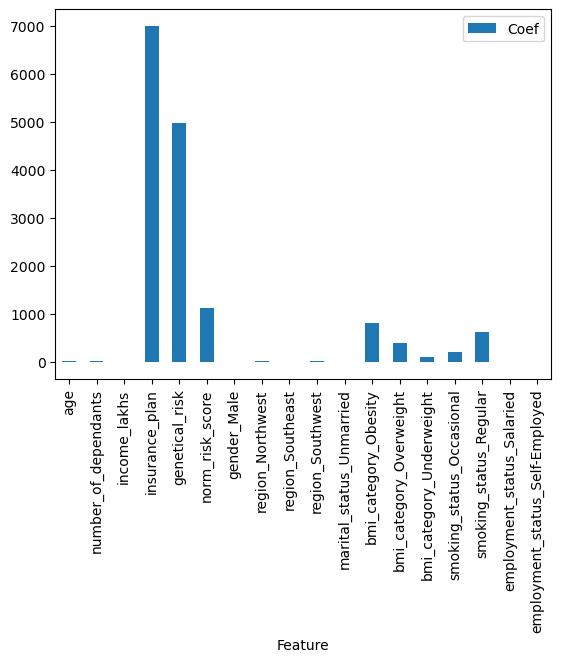

In [138]:
lr_model_coef_df.plot(x = 'Feature',kind= 'bar')

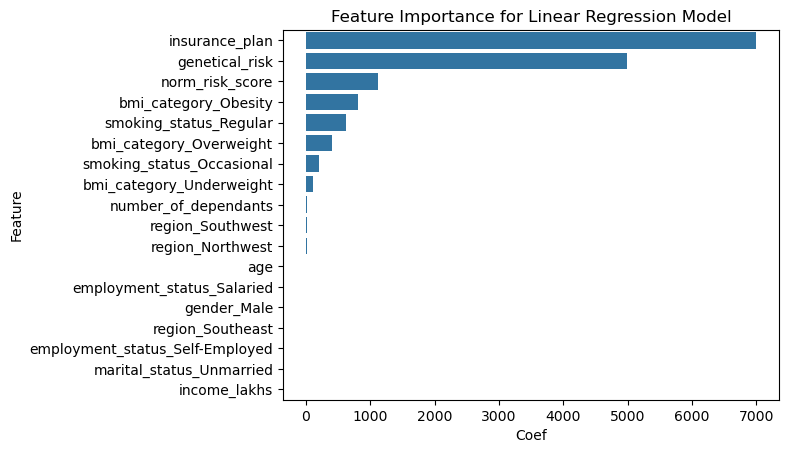

In [139]:
sns.barplot(data = lr_model_coef_df.sort_values(by = 'Coef',ascending = False),y = 'Feature',x = 'Coef')
plt.title('Feature Importance for Linear Regression Model')
plt.show()

In [140]:
rg_model = Ridge()
rg_model.fit(X_train,y_train)
rg_model.score(X_test,y_test)

0.9885381917806101

In [141]:
ls_model = Lasso()
ls_model.fit(X_train,y_train)
ls_model.score(X_test,y_test)

0.9885326802227431

In [142]:
xg_model = XGBRegressor()

In [143]:
xg_model.fit(X_train,y_train)
xg_model.score(X_test,y_test)

0.9877885580062866

In [144]:
xg_model.score(X_train,y_train)

0.9926111102104187

In [145]:
y_lr_pred = lr_model.predict(X_test)
y_xg_pred = xg_model.predict(X_test)

In [146]:
print(f'Log Reg r2 = {r2_score(y_test,y_lr_pred)}, rmse = {root_mean_squared_error(y_test,y_lr_pred)}')
print(f'XGBoost r2 = {r2_score(y_test,y_xg_pred)}, rmse = {root_mean_squared_error(y_test,y_xg_pred)}')


Log Reg r2 = 0.9885387057335232, rmse = 296.0060349738266
XGBoost r2 = 0.9877885580062866, rmse = 305.5390548575649


In [148]:
# Here since linear regression is giving almost same results as other so we will go with it, due to
# its simiplicity and interpretability

In [149]:
# Also we can skip hyperparameter tuning here since default is already giving pretty good results

In [150]:
best_model = lr_model

### Error Analysis

In [151]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test

In [152]:
results_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred,
    'diff': residuals,
    'diff_pct': residuals_pct
})

In [153]:
results_df.head()

,actual,predicted,diff,diff_pct
11665,4665,4615.506225,-49.493775,-1.060960
1312,9017,8904.845880,-112.154120,-1.243807
15320,6861,7003.162124,142.162124,2.072032
20069,9682,9791.785458,109.785458,1.133913
7755,6121,6004.926523,-116.073477,-1.896316


In [154]:
results_df.describe()

,actual,predicted,diff,diff_pct
count,6026.000000,6026.000000,6026.000000,6026.000000
mean,8179.623465,8176.210185,-3.413280,0.138040
std,2765.156856,2750.152907,296.010917,4.269082
min,3503.000000,3980.800147,-1049.380980,-14.097507
25%,6081.250000,6004.150291,-248.363171,-3.078546
50%,7951.000000,7990.361594,-4.502611,-0.058562
75%,9592.750000,9589.940122,246.542008,3.147719
max,18186.000000,17870.142976,639.558930,14.402889


In [155]:
# As we can see, the error percentage is as high as 86 percent. So our model is not performing very well

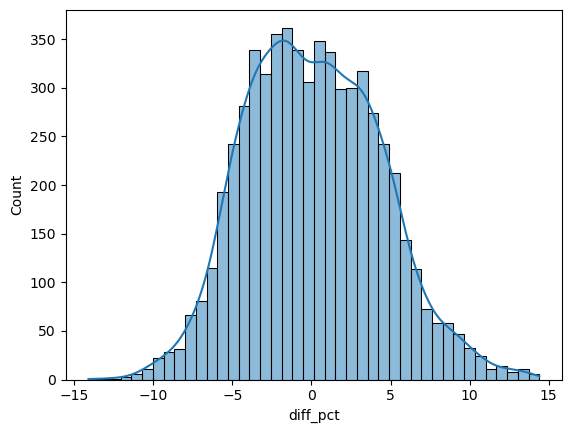

In [156]:
sns.histplot(results_df['diff_pct'],kde =True)
plt.show()

In [148]:
# After discussing with business, we came to a threshold of 10 percent. We have to try and contain the error within 10 percent'

In [157]:
extreme_error_threshold = 10
extreme_results_df = results_df[abs(results_df['diff_pct'])>extreme_error_threshold]

In [158]:
extreme_results_df.shape

(115, 4)

In [159]:
results_df.shape

(6026, 4)

In [160]:
extreme_error_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_error_pct

1.9083969465648856

In [161]:
# We have successfully contained most of the errors within threshold limits (10)

In [162]:
results_df[abs(results_df['diff_pct'])>50].shape

(0, 4)

In [164]:
# No record has more than 50 percent of error

In [165]:
results_df.head()

,actual,predicted,diff,diff_pct
11665,4665,4615.506225,-49.493775,-1.060960
1312,9017,8904.845880,-112.154120,-1.243807
15320,6861,7003.162124,142.162124,2.072032
20069,9682,9791.785458,109.785458,1.133913
7755,6121,6004.926523,-116.073477,-1.896316


In [166]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11665,1.000000,0.000000,0.232323,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,1
1312,1.000000,0.000000,0.060606,0.5,0.2,0.0,0,0,0,1,1,0,1,0,0,0,1,0
15320,0.142857,0.000000,0.232323,0.0,0.4,0.0,0,0,0,1,1,0,1,0,0,1,0,0
20069,0.571429,0.000000,0.050505,0.5,0.4,0.0,0,0,0,1,1,0,0,1,1,0,0,0
7755,0.285714,0.333333,0.161616,0.0,0.4,0.0,1,1,0,0,1,0,0,0,0,0,1,0


In [167]:
req_index = extreme_results_df.index
extreme_errors_df = X_test.loc[req_index]

In [168]:
extreme_errors_df.shape

(115, 18)

In [169]:
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
16967,0.428571,0.333333,0.070707,0.0,0.0,0.000000,1,0,1,0,1,1,0,0,0,0,0,1
19957,0.000000,0.000000,0.030303,0.0,0.0,0.000000,0,1,0,0,1,0,0,0,0,0,1,0
7423,0.142857,1.000000,0.000000,0.0,0.0,0.000000,0,0,1,0,0,0,0,0,0,0,0,1
5843,0.571429,0.333333,0.020202,0.0,0.0,0.428571,1,0,1,0,1,0,1,0,0,0,1,0
9886,0.571429,0.666667,0.080808,0.0,0.2,0.428571,0,0,0,0,1,0,0,1,0,0,1,0


In [170]:
X_test.head()

,age,number_of_dependants,income_lakhs,insurance_plan,genetical_risk,norm_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
11665,1.000000,0.000000,0.232323,0.0,0.0,0.0,1,0,0,1,1,0,0,0,0,1,0,1
1312,1.000000,0.000000,0.060606,0.5,0.2,0.0,0,0,0,1,1,0,1,0,0,0,1,0
15320,0.142857,0.000000,0.232323,0.0,0.4,0.0,0,0,0,1,1,0,1,0,0,1,0,0
20069,0.571429,0.000000,0.050505,0.5,0.4,0.0,0,0,0,1,1,0,0,1,1,0,0,0
7755,0.285714,0.333333,0.161616,0.0,0.4,0.0,1,1,0,0,1,0,0,0,0,0,1,0


<Axes: xlabel='income_lakhs', ylabel='Count'>

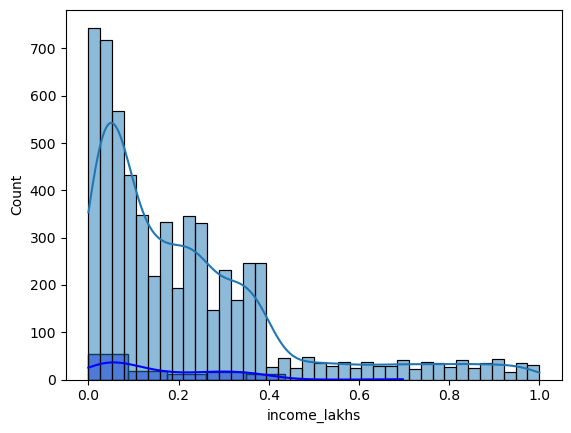

In [171]:
sns.histplot(extreme_errors_df['income_lakhs'],kde = True,color = 'blue')
sns.histplot(X_test['income_lakhs'],kde = True)

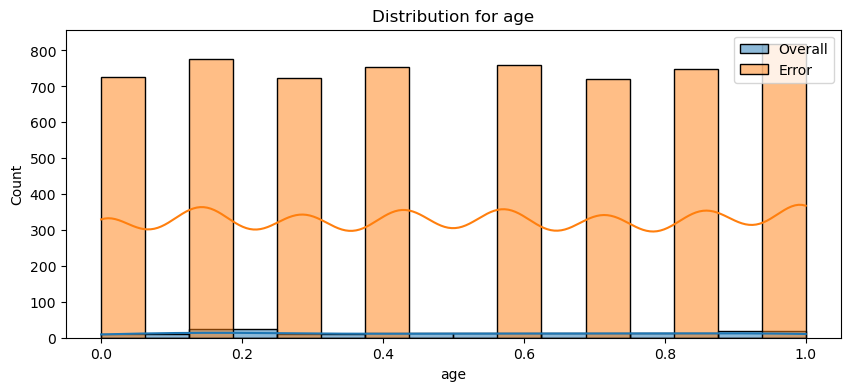

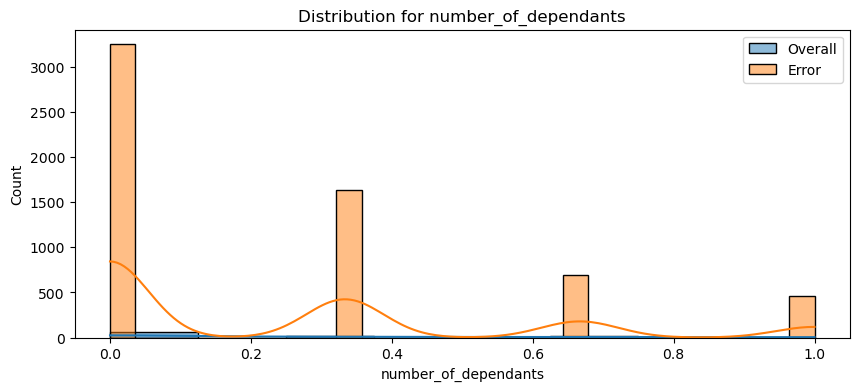

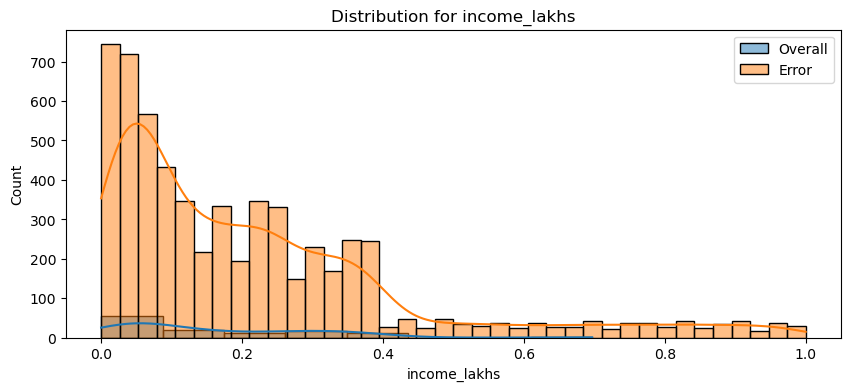

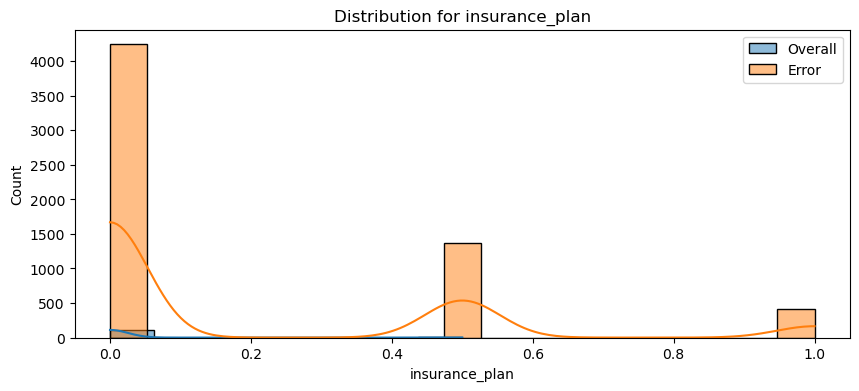

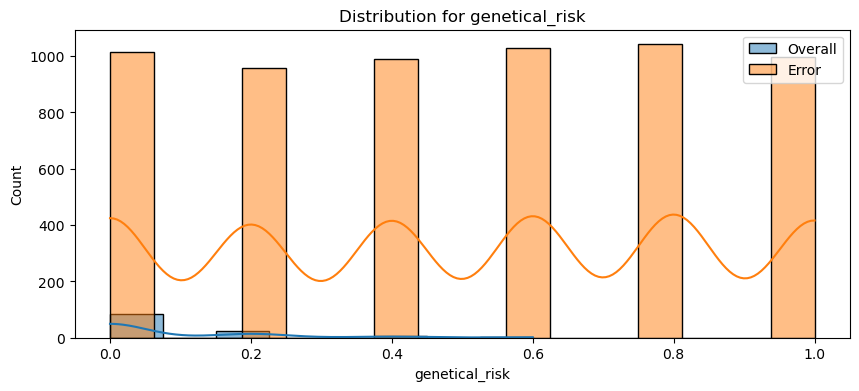

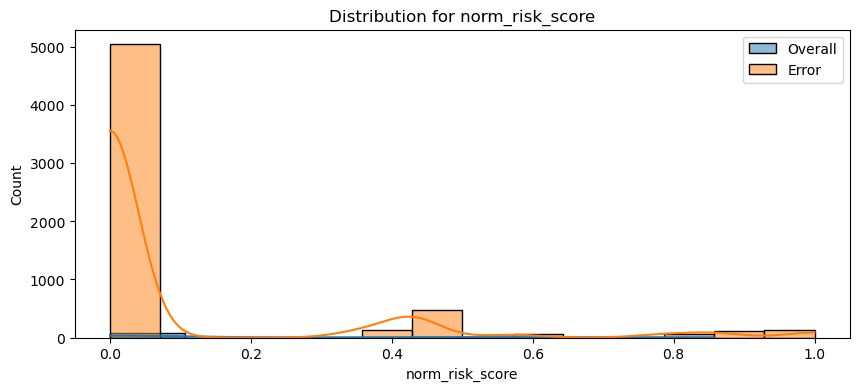

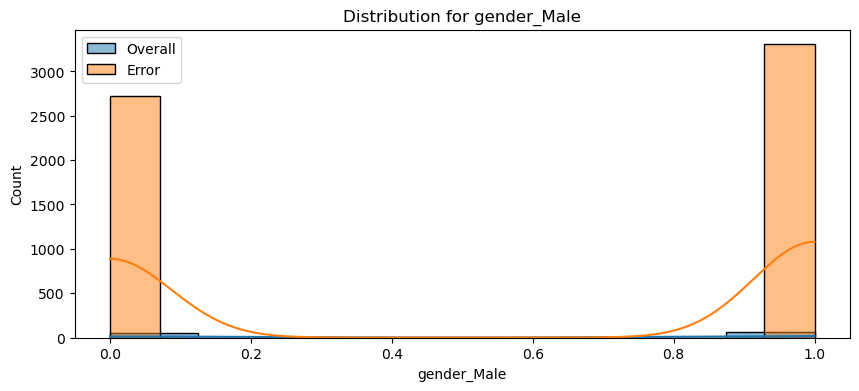

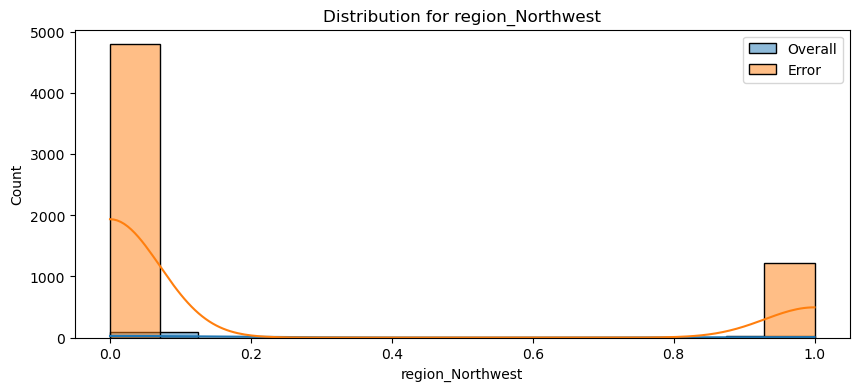

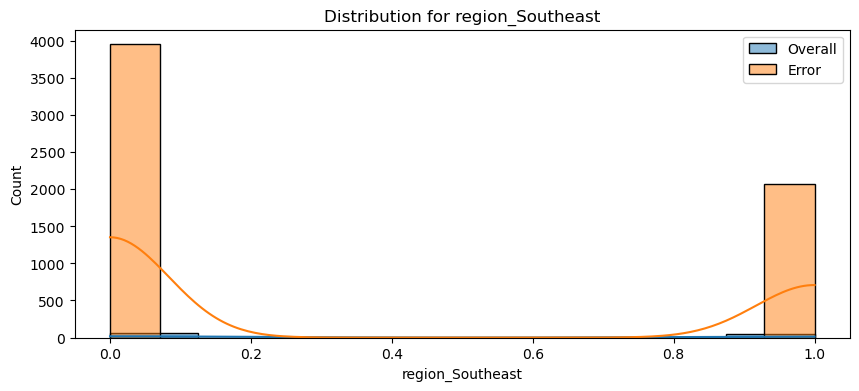

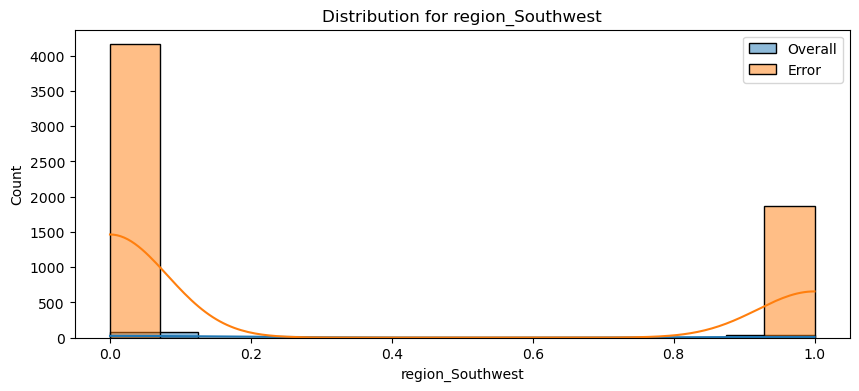

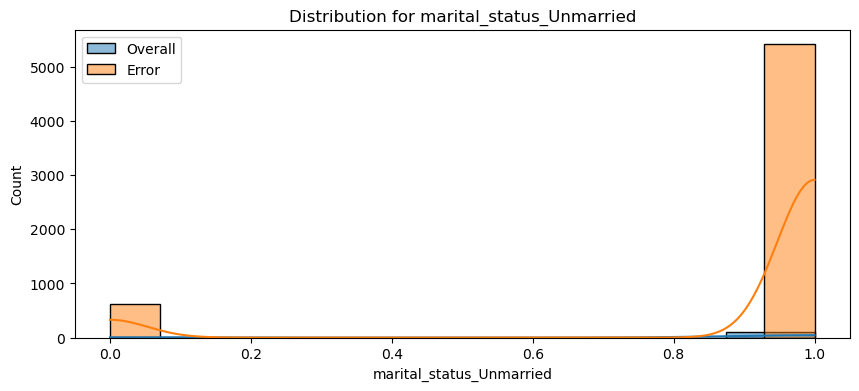

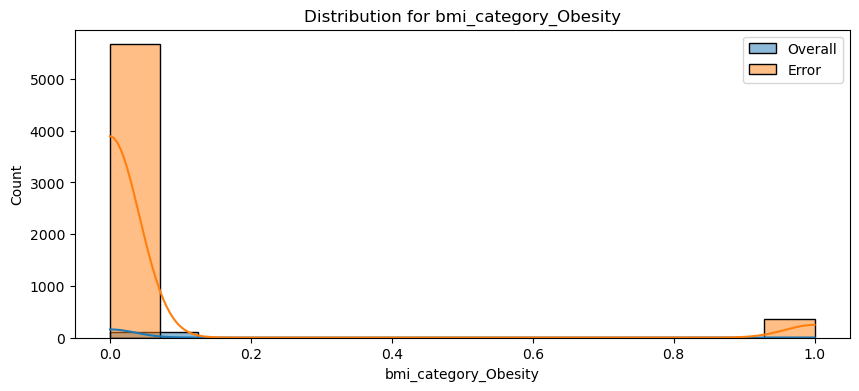

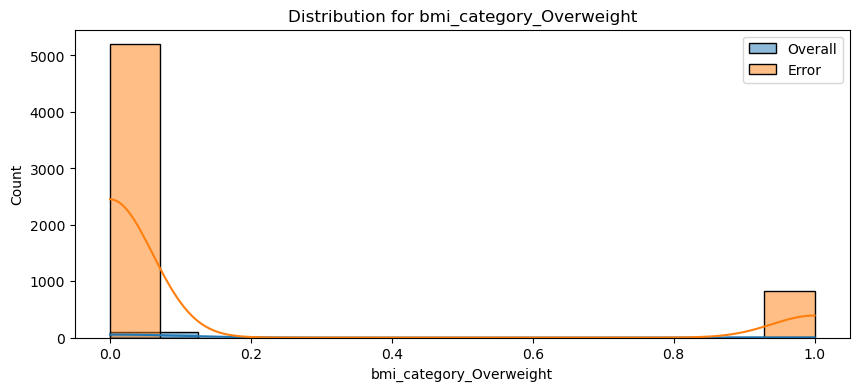

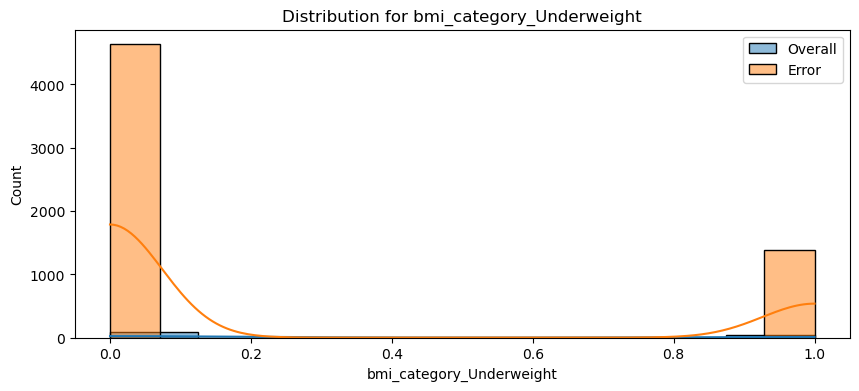

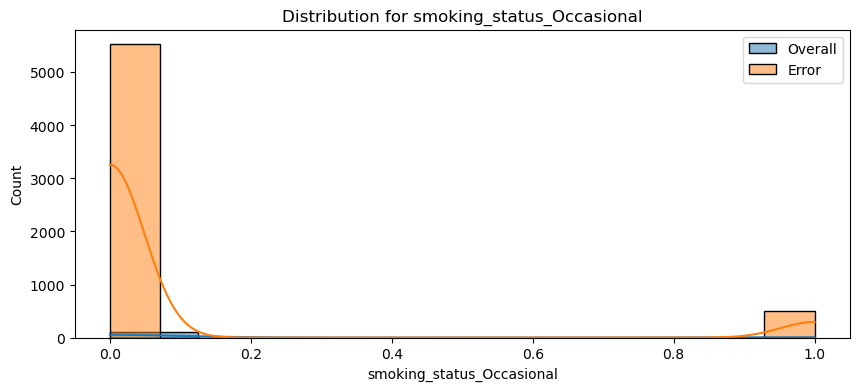

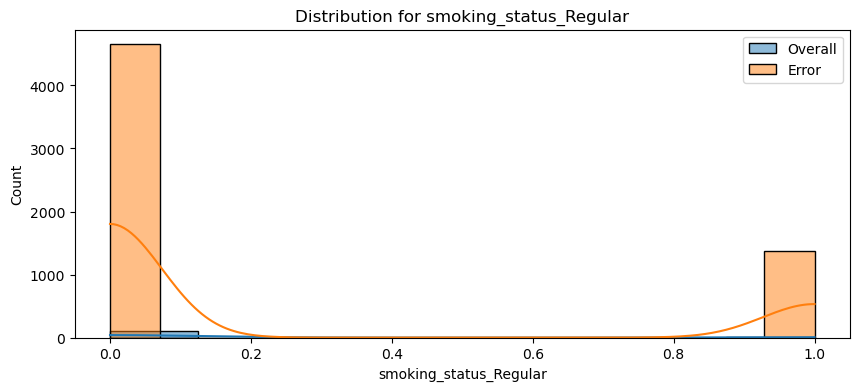

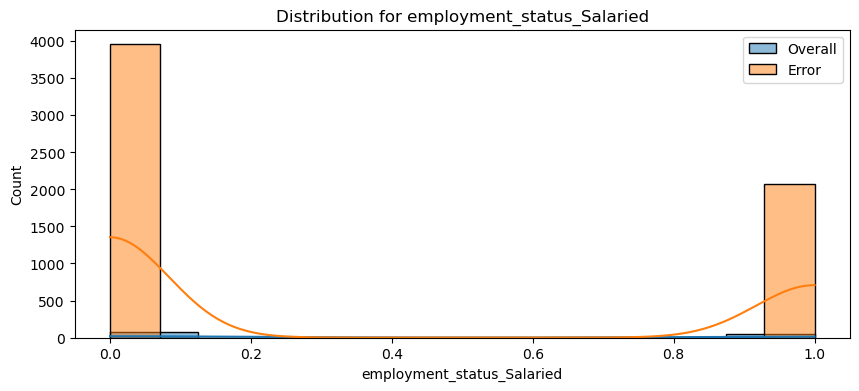

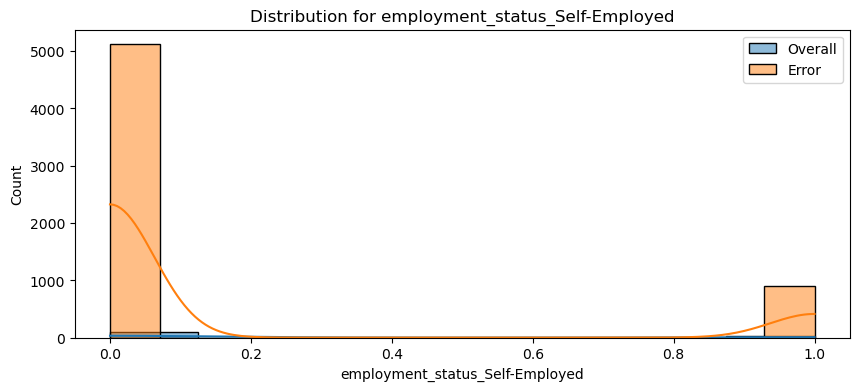

In [172]:
for feature in extreme_errors_df.columns:
    plt.figure(figsize = (10,4))
    sns.histplot(extreme_errors_df[feature],kde = True,label = 'Overall')
    sns.histplot(X_test[feature],kde = True,label = 'Error')
    plt.title(f'Distribution for {feature}')
    plt.legend()
    plt.show()

In [167]:
# As we can see, for all features the shapes of distribution for X_test, errors are almost same 
# which means errors are distributed as they should be

In [174]:
# Our model is well built, now lets export it to deploy to production

### Export the Model

In [175]:
from joblib import dump
dump(best_model,'Artifacts/model_young.joblib')

['Artifacts/model_young.joblib']

In [176]:
# we also need to dump out scaler object for the model to work

In [177]:
scaler_with_cols = {'scaler':scaler, 'cols_to_scale':cols_to_scale}

In [178]:
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_level',
  'income_lakhs',
  'insurance_plan',
  'genetical_risk']}

In [180]:
dump(scaler_with_cols,'Artifacts/scaler_young.joblib')

['Artifacts/scaler_young.joblib']